In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import feature
import os
from utils import *

In [2]:
data_path = './data_fall/rgb/'
data_file = np.array(sorted(os.listdir(data_path)))

In [3]:
proj = getdata(data_path,'./data_fall/labels.csv')

In [4]:
proj.dataFile

array(['rgb_0001.png', 'rgb_0002.png', 'rgb_0003.png', ...,
       'rgb_1299.png', 'rgb_1300.png', 'rgb_1301.png'], dtype='<U12')

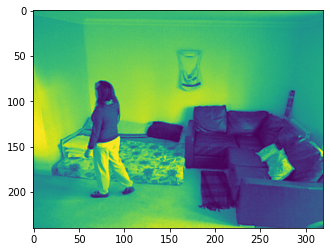

In [5]:
plt.imshow(proj.get1img(44,'gray'))

In [6]:
hu_data = proj.feature_7HU()
hu_data.shape

(1181, 7)

In [7]:
idx = np.random.permutation(proj.n_index)

In [8]:
label_train,label_test = train_test_split(proj.label,0.7,idx)

In [9]:
hu_train,hu_test = train_test_split(hu_data,0.7,idx)

In [10]:
print_class_sep(hu_train,label_train)

--Divergence--
D01 = 1.1021803267527044
D02 = 1.0089275335060055
D10 = 4.412460387249966
D12 = 2.5871855278498512
D20 = 5.835863475888455
D21 = 3.658595352086495
Divergence = 18.605212603333477
Scatter Matrix J3 = 7.00858715753863
Fisher discriminant ratio = 3.160508182693361
(fisher class1,2 = 1.1896702856083),class1,3 = 1.8178457529468517),class2,3 = 0.1529921441382091)


/Users/layyer/Work/Course/image_proc_course/project/utils.py:159: RuntimeWarning: divide by zero encountered in true_divide
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:159: RuntimeWarning: divide by zero encountered in log
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:159: RuntimeWarning: invalid value encountered in multiply
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:159: RuntimeWarning: invalid value encountered in true_divide
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))


In [11]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report

In [12]:
knn_hu = KNN(n_neighbors=5)
knn_hu.fit(hu_train,label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
print(classification_report(label_test, knn_hu.predict(hu_test) ))

              precision    recall  f1-score   support

         1.0       0.58      0.77      0.66       129
         2.0       0.60      0.45      0.51       130
         3.0       0.44      0.40      0.42        96

    accuracy                           0.55       355
   macro avg       0.54      0.54      0.53       355
weighted avg       0.55      0.55      0.54       355



In [14]:
hog_data = proj.feature_hog()
hog_data.shape

(1181, 4800)

In [15]:
hog_train,hog_test = train_test_split(hog_data,0.7,idx)
hog_data = None
len(hog_train)==len(label_train)

True

In [31]:
print("--Divergence--")
print(f"Divergence = {data_div(hog_train,label_train)}")
fisher = fdr(hog_train,label_train)
print(f"Fisher discriminant ratio = {fisher[0]}")
print(f"(fisher class1,2 = {fisher[1][0]}),class1,3 = {fisher[1][1]}),class2,3 = {fisher[1][2]})")



--Divergence--


/Users/layyer/Work/Course/image_proc_course/project/utils.py:150: RuntimeWarning: divide by zero encountered in true_divide
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:150: RuntimeWarning: invalid value encountered in true_divide
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:150: RuntimeWarning: divide by zero encountered in log
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:150: RuntimeWarning: invalid value encountered in multiply
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))


D01 = 133.72532176842964
D02 = 173.10171277112116
D10 = 337.6608702113664
D12 = 258.66914372449725
D20 = 428.93724233590524
D21 = 297.6214193231445
Divergence = 1629.7157101344642
Fisher discriminant ratio = 900.6913580557984
(fisher class1,2 = 124.2402521814011),class1,3 = 403.3801696240693),class2,3 = 373.07093625032803)


In [19]:
knn_hog = KNN(n_neighbors=3)
knn_hog.fit(hog_train,label_train)
print(classification_report(label_test, knn_hog.predict(hog_test) ))

              precision    recall  f1-score   support

         1.0       1.00      0.97      0.98       129
         2.0       0.98      0.97      0.97       130
         3.0       0.93      0.98      0.95        96

    accuracy                           0.97       355
   macro avg       0.97      0.97      0.97       355
weighted avg       0.97      0.97      0.97       355



In [11]:
lbp_data = proj.feature_lbp()
lbp_data.shape

(1181, 65)

In [12]:
lbp_train,lbp_test = train_test_split(lbp_data,0.7,idx)
lbp_data = None
len(lbp_train)==len(label_train)

True

In [13]:
print_class_sep(lbp_train,label_train)

--Divergence--
D01 = 17.177098850130484
D02 = 10.502237971300545
D10 = 22.256238287338654
D12 = 9.412282592845148
D20 = 17.38356395123309
D21 = 10.756974599087183
Divergence = 87.4883962519351
Scatter Matrix J3 = 65.17082118367172
Fisher discriminant ratio = 32.524272494356815
(fisher class1,2 = 18.49025117275051),class1,3 = 8.986546193891552),class2,3 = 5.047475127714752)


In [23]:
knn_lbp = KNN(n_neighbors=3)
knn_lbp.fit(lbp_train,label_train)
print(classification_report(label_test, knn_lbp.predict(lbp_test) ))

              precision    recall  f1-score   support

         1.0       0.97      0.87      0.92       129
         2.0       0.76      0.72      0.74       130
         3.0       0.64      0.78      0.70        96

    accuracy                           0.79       355
   macro avg       0.79      0.79      0.79       355
weighted avg       0.80      0.79      0.79       355



In [32]:
zernike_data = proj.feature_zernike()
zernike_data.shape

(1181, 25)

In [33]:
zernike_train,zernike_test = train_test_split(zernike_data,0.7,idx)
zernike_data = None
len(zernike_train)==len(label_train)

True

In [34]:
print_class_sep(zernike_train,label_train)

--Divergence--
D01 = 2.6029016223496986
D02 = 3.871024154791843
D10 = 3.062952645638787
D12 = 3.539157284447935
D20 = 5.785950748071778
D21 = 4.543044170517809
Divergence = 23.40503062581785
Scatter Matrix J3 = 25.00155775839795
Fisher discriminant ratio = 3.4094476636929656
(fisher class1,2 = 0.5464290001001424),class1,3 = 1.7939782508168016),class2,3 = 1.0690404127760214)


/Users/layyer/Work/Course/image_proc_course/project/utils.py:150: RuntimeWarning: invalid value encountered in true_divide
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:150: RuntimeWarning: divide by zero encountered in true_divide
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:150: RuntimeWarning: divide by zero encountered in log
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:150: RuntimeWarning: invalid value encountered in multiply
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))


In [36]:
knn_zer = KNN(n_neighbors=5)
knn_zer.fit(zernike_train,label_train)
print(classification_report(label_test, knn_zer.predict(zernike_test) ))

              precision    recall  f1-score   support

         1.0       0.42      0.53      0.47       129
         2.0       0.42      0.36      0.39       130
         3.0       0.38      0.32      0.35        96

    accuracy                           0.41       355
   macro avg       0.41      0.41      0.40       355
weighted avg       0.41      0.41      0.41       355



In [37]:
coocMat_data = proj.feature_coMat()
coocMat_data.shape

(1181, 12)

In [38]:
coocMat_train,coocMat_test = train_test_split(coocMat_data,0.7,idx)
coocMat_data = None
len(coocMat_train)==len(label_train)

True

In [39]:
print_class_sep(coocMat_train,label_train)

--Divergence--
D01 = 5.627174418536592
D02 = 4.315677163217253
D10 = 7.927349101356691
D12 = 5.534509545473272
D20 = 6.979025857398129
D21 = 6.091498783140985
Divergence = 36.47523486912292
Scatter Matrix J3 = 12.022766646736855
Fisher discriminant ratio = 42.164133016065186
(fisher class1,2 = 21.56371814505947),class1,3 = 18.651164654800855),class2,3 = 1.9492502162048568)


/Users/layyer/Work/Course/image_proc_course/project/utils.py:150: RuntimeWarning: divide by zero encountered in true_divide
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:150: RuntimeWarning: invalid value encountered in true_divide
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:150: RuntimeWarning: divide by zero encountered in log
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:150: RuntimeWarning: invalid value encountered in multiply
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))


In [44]:
knn_coMat = KNN(n_neighbors=3)
knn_coMat.fit(coocMat_train,label_train)
print(classification_report(label_test, knn_coMat.predict(coocMat_test) ))

              precision    recall  f1-score   support

         1.0       0.98      0.97      0.97       129
         2.0       0.91      0.89      0.90       130
         3.0       0.88      0.91      0.89        96

    accuracy                           0.92       355
   macro avg       0.92      0.92      0.92       355
weighted avg       0.92      0.92      0.92       355



In [49]:
hog_test.shape

(355, 4800)

In [50]:
proj.get1img(44,'gray').shape

(240, 320)

In [51]:
256*170

43520

In [59]:
coocMat_train.max()

2225.61718932112